In [125]:
import utils.training as train
import utils.constants as c
import pandas as pd
import utils.preprocessing as pp
import utils.evaluation as eval
import utils.visualization as vis


In [141]:
import importlib

importlib.reload(train)
importlib.reload(c)
importlib.reload(pp)
importlib.reload(eval)
importlib.reload(vis)

<module 'utils.visualization' from 'd:\\FERI\\transfer-learning\\src\\utils\\visualization.py'>

In [135]:
country = 'India'
commodity = 'Rice'

In [136]:
param_grid = {
    'network_type': ['RNN', 'LSTM', 'GRU'],
    'window_size': [3, 5, 7],
    'learning_rate': [1e-4, 1e-2],  # min and max for uniform sampling
    'num_layers': [1, 2, 3],
    'neurons_per_layer': [32, 64, 128],
    'batch_size': [16, 32, 64]
}

dataset_info = {
    'country': country,
    'commodity': commodity
}

In [137]:
df = pd.read_csv(c.get_countries(commodity, country)['processed'])

In [138]:
best_model, best_params, metrics = train.random_search_rnn(df[['usdprice']], param_grid, dataset_info , num_iterations=50)

In [139]:
best_params, metrics

({'network_type': 'GRU',
  'window_size': 3,
  'learning_rate': 0.004036436612508796,
  'num_layers': 1,
  'neurons_per_layer': 32,
  'batch_size': 16},
 {'val_loss': 0.011340518482029438,
  'val_mae': 0.08302538841962814,
  'test_mse': 0.00019374506518300417,
  'test_mae': 0.009791429550307141})

3/3 [==============================] - 0s 5ms/step


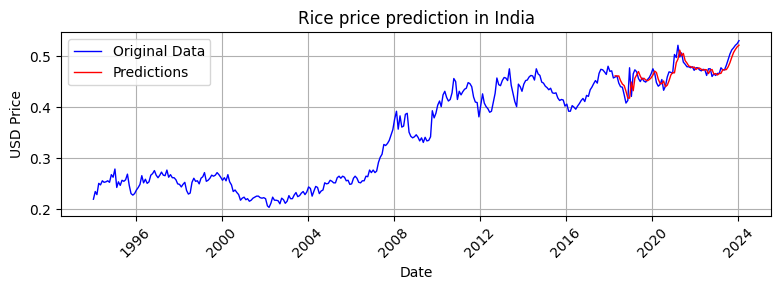

In [142]:
vis.plot_best_model(df, best_model, best_params, c.get_scaler_filename(country, commodity), f'{commodity} price prediction in {country}')